Problem description: http://incompleteideas.net/sutton/book/bookdraft2017june19.pdf

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
matplotlib.style.use('seaborn')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 5)

from IPython.display import display, Image
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

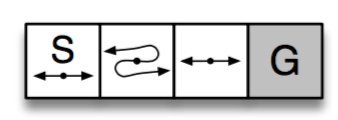

In [2]:
Image('./short-corridor-with-switched-actions.png')

In [3]:
INIT_STATE = 0
TERMINAL_STATE = 3
# state that reverse the result of the action
REVERSE_STATE = 1
LEFT = -1
RIGHT = 1
ACTIONS = [LEFT, RIGHT]

def generate_an_episode(starting_state, greedy_action, prob_right):
    state = starting_state
    reward = 0
    while state != TERMINAL_STATE:
        if np.random.random() <= prob_right:
            act = RIGHT
        else:
            act = LEFT

        if state == REVERSE_STATE:
            state -= act
        else:
            state += act
        reward -= 1
        state = max(state, 0)
    return reward

In [4]:
epsilon = 0.1
# epsilon-greedy left
prob_right = epsilon / 2

rewards = []
for i in range(2000):
    rewards.append(generate_an_episode(INIT_STATE, RIGHT, prob_right))

In [5]:
np.mean(rewards)

-82.953500000000005

In [6]:
epsilon = 0.1
# epsilon-greedy right
prob_right = (1 - epsilon) + epsilon / 2

rewards = []
for i in range(2000):
    rewards.append(generate_an_episode(INIT_STATE, RIGHT, prob_right))

In [7]:
np.mean(rewards)

-45.130000000000003

Maximize

$$f(p) = p(1-p)p = p^2 - p^3$$

to obtain the best policy. Then $p = \frac{2}{3}$ (differentiate $f$ and set derivative to zero), to calculate the corresponding $\epsilon$, set

$$\frac{\epsilon}{2} + (1 - \epsilon) = \frac{2}{3}$$

It turns out $\epsilon = \frac{2}{3}$, too.

Calculate the opitmal value of the initial state may be more involved, so just simulate.

In [8]:
# probabilities of going right
probs = np.sort(np.arange(0.02, 1, 0.02).tolist() + [2/3])

avg_rewards = []
std_rewards = []
for k, p in enumerate(probs):
    print(k, end=',')
    rewards = []
    for i in range(2000):
        rewards.append(generate_an_episode(INIT_STATE, RIGHT, p))
    avg_rewards.append(np.mean(rewards))
    std_rewards.append(np.std(rewards))

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,

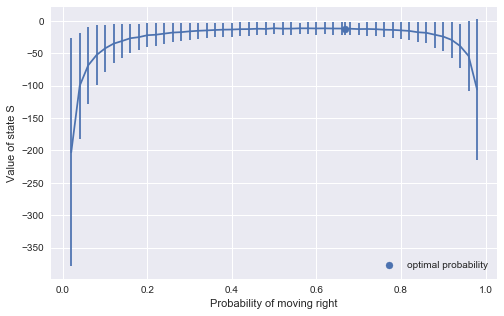

In [9]:
plt.errorbar(probs, avg_rewards, yerr=std_rewards)
idx = np.where(probs == 2/3)[0][0]
plt.scatter([probs[idx]], avg_rewards[idx], label='optimal probability')
plt.legend(loc='lower right')
plt.xlabel('Probability of moving right')
plt.ylabel('Value of state S')

In [10]:
idx

33

In [11]:
np.argmax(avg_rewards)

24

The best reward is around 2/3 because the region around it is very flat.